In [27]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [28]:
def SOR(A, b, x0, w, tol, maxiter):
    n = len(b)
    x = x0.copy()
    it = 0
    res = 1
    while res > tol and it < maxiter:
        it += 1
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x[j]
            x[i] = (1 - w) * x[i] + (w / A[i, i]) * (b[i] - s)
        res = np.linalg.norm(b - A @ x)
    return x, it

In [29]:
def w_opt(A, b, x0, tol, maxiter):
    n = len(b)
    w = np.linspace(1, 2, 100)
    k = np.zeros(len(w))
    for i in range(len(w)):
        x, k[i] = SOR(A, b, x0, w[i], tol, maxiter)
    return w, k

In [30]:
A = np.array([[3, -1, -1], [-1, 3, 1], [2, 1, 4]])
b = np.array([1, 3, 7])

In [31]:
w, k = w_opt(A, b, np.zeros(3), 1e-8, 1000)

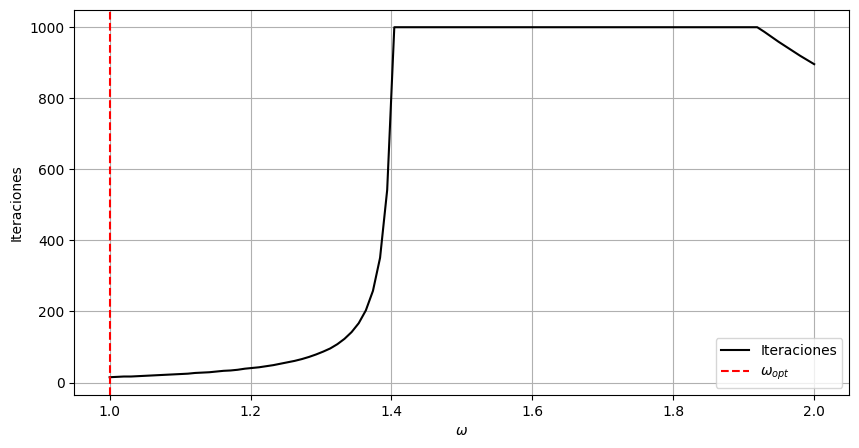

In [32]:
fig = plt.figure(figsize=(10, 5))
plt.plot(w, k, 'k-', label='Iteraciones')
plt.axvline(w[np.argmin(k)], color='r', ls='--', label=r'$\omega_{opt}$')
plt.xlabel(r'$\omega$')
plt.ylabel('Iteraciones')
plt.legend()
plt.grid()
plt.show()

In [33]:
sol = SOR(A, b, np.zeros(3), w[np.argmin(k)], 1e-8, 1000)[0]

print('w_opt =', w[np.argmin(k)])
print('solucion del sistema =', sol)

w_opt = 1.0
solucion del sistema = [1. 1. 1.]
